In [7]:
import sys
!conda install --yes --prefix {sys.prefix} -c anaconda networkx
!conda install --yes --prefix {sys.prefix} -c plotly plotly
!conda install --yes --prefix {sys.prefix} -c conda-forge matplotlib

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... 
  - anaconda::ca-certificates-2019.5.15-0, anaconda::certifi-2019.6.16-py37_0, anaconda::conda-4.7.12-py37_0, anaconda::openssl-1.1.1c-he774522_1
  - anaconda::ca-certificates-2019.5.15-0, anaconda::certifi-2019.6.16-py37_0, anaconda::openssl-1.1.1c-he774522_1, defaults::conda-4.7.12-py37_0
  - anaconda::certifi-2019.6.16-py37_0, anaconda::conda-4.7.12-py37_0, anaconda::openssl-1.1.1c-he774522_1, defaults::ca-certificates-2019.5.15-0
  - anaconda::certifi-2019.6.16-py37_0, anaconda::openssl-1.1.1c-he774522_1, defaults::ca-certificates-2019.5.15-0, defaults::conda-4.7.12-py37_0
  - anaconda::certifi-2019.6.16-py37_0, anaconda::conda-4.7.12-py37_0, defaults::ca-certificates-2019.5.15-0, defaults::openssl-1.1.1c-he774522_1
  - anaconda::certifi-2019.6.16-py37_0, defaults::ca-certificates-2019.5.15-0, defaults::conda-4.7.12-py37_0, defaults::openssl-1.1.1c-he774522_1
  

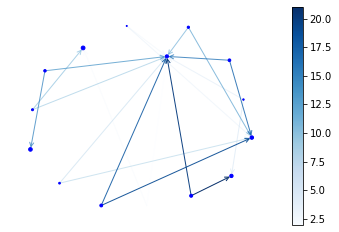

In [43]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

# read from the text file for the edges and nodes, make a graph with that
# instagram-input.txt
# comma delimited => user,category1,category2

filename = "C:\develop\jupyter-notebooks\social-media-analytics\m5-assignment\instagram-input.txt"
with open(filename) as f:
    content = f.readlines()
content = [x.strip() for x in content]

splitData = [line.split(",") for line in content]

users = []
cat1 = []
cat2 = []
edges = []

for a,b,c in splitData:
    users.append(a)
    cat1.append(b)
    cat2.append(c)
    edges.append([a,b])
    edges.append([a,c])

# distinct the lists
distinctUsers = list(set(users))
distinctCat1 = list(set(cat1))
distinctCat2 = list(set(cat2))

G = nx.DiGraph()

# add the nodes
G.add_nodes_from(distinctUsers)
G.add_nodes_from(distinctCat1)
G.add_nodes_from(distinctCat2)

# add the edges
G.add_edges_from(edges)

pos = nx.layout.spring_layout(G, scale=15, k=8)

node_sizes = [i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=1)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()